In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data.head()

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [4]:
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data.head()

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,1010,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,2110,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,1913,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,2111,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,1710,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58


In [5]:
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data.head()

,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수
0,10,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13
1,21,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29
2,19,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46
3,21,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54
4,17,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58


In [6]:
def get_encoding(data, category, target):
    df = pd.DataFrame(data[category])
    for i in range(len(df)):
        if df.iloc[i, 0] == target : df.iloc[i, 0] = 1
        else: df.iloc[i, 0] = 0
    data.drop(category, axis = 1, inplace= True)
    data = data.join(df)
    return data

In [7]:
data = get_encoding(data, '품목대분류코드', 21)

In [8]:
data.head()

,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,품목대분류코드
0,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13,0
1,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29,1
2,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46,0
3,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54,1
4,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58,0


In [9]:
data['품목대분류코드'].value_counts()

0    443245
1     76052
Name: 품목대분류코드, dtype: int64

여성    55.934098
남성    44.065902
Name: 성별, dtype: float64
40대       28.392416
30대       28.339820
20대       21.280177
50대       12.204807
60대 이상     5.686898
20세 미만     4.095882
Name: 연령, dtype: float64
신혼영유아가구    32.285804
1인가구       28.448956
초중고자녀가구    18.733235
성인자녀가구     14.845106
노인가구        5.686898
Name: 가구생애주기, dtype: float64


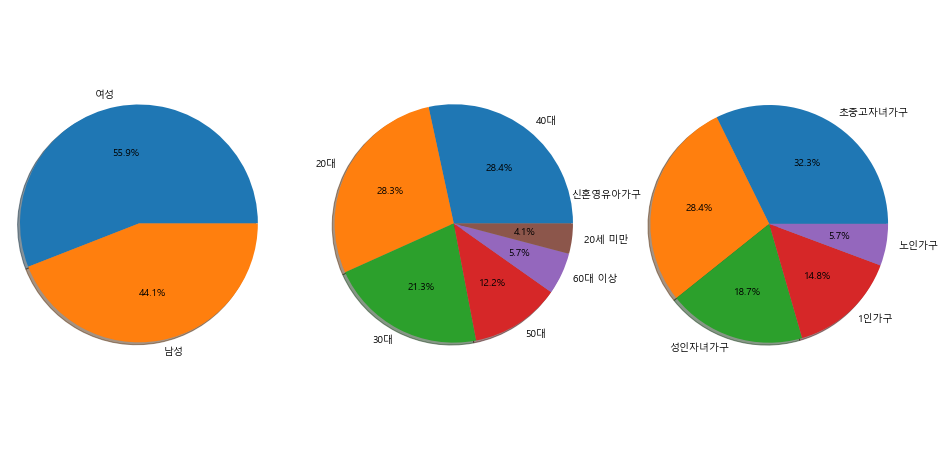

In [10]:
data_f = data[data['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령', '가구생애주기']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data[category].unique()
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

In [11]:
data_f_Seoul = data_f[data_f['고객소재지_광역시도'] == '서울특별시']
df = pd.DataFrame(data_f_Seoul['고객소재지_시군구'].value_counts())
df.sort_values(by = ['고객소재지_시군구'], axis=0, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index' : '고객소재지_시군구', '고객소재지_시군구' : '합계'}, inplace=True)
df

,고객소재지_시군구,합계
0,금천구,672
1,관악구,754
2,강북구,792
3,양천구,808
4,도봉구,862
5,노원구,1207
6,중랑구,1259
7,광진구,1333
8,중구,1463
9,서초구,1550


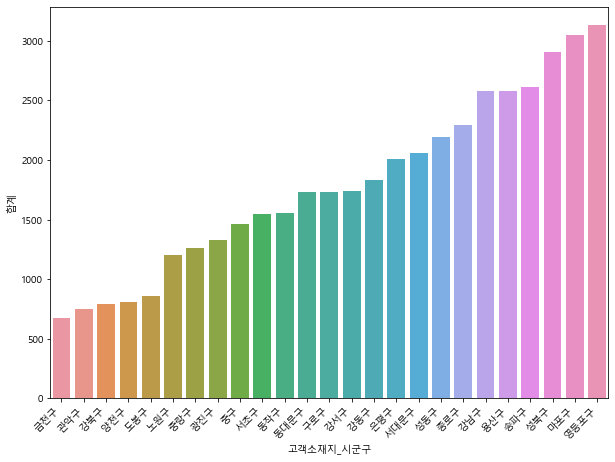

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.barplot(x = '고객소재지_시군구', y = '합계', data = df)
fig.autofmt_xdate(rotation = 45)

In [13]:
#인코딩 적용 함수 만들기
def get_dummies(column, df):
    dummies = pd.get_dummies(df[column])
    df.drop(column, axis = 1, inplace = True)
    df = df.join(dummies)
    return df

In [14]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

In [15]:
data_dummies.head()

,매출금액,매출건수,품목대분류코드,강남구,강동구,강북구,강서구,강화군,계양구,고양시,...,양천구,연수구,영등포구,옹진군,용산구,용인시,은평구,종로구,중구,중랑구
0,782521,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,963789,29,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,924309,46,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1089360,54,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1656740,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0.853548
1    0.146452
Name: 품목대분류코드, dtype: float64


<AxesSubplot:xlabel='품목대분류코드', ylabel='count'>

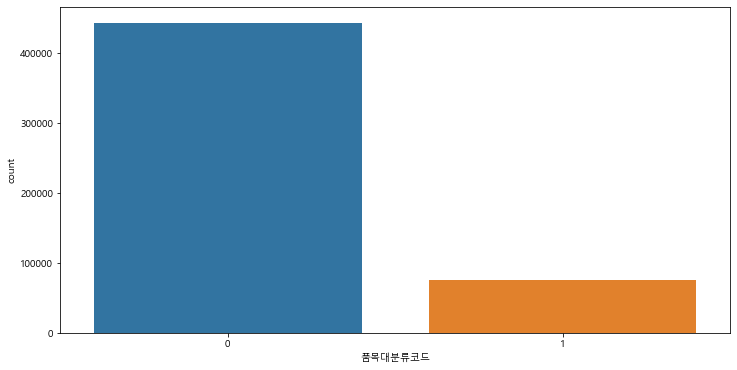

In [16]:
N = len(data_dummies)
print(data_dummies['품목대분류코드'].value_counts()/N)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))
sns.countplot(x = '품목대분류코드', data = data_dummies)

In [17]:
def get_preprocessed_df(df, category):
    df_copy = df.copy()
    scaled = np.log1p(df_copy[category])
    df_copy.insert(0, category + '_Scaled', scaled)
    df_copy.drop(category, axis = 1, inplace = True)
    return df_copy

<AxesSubplot:xlabel='매출금액_Scaled', ylabel='Density'>

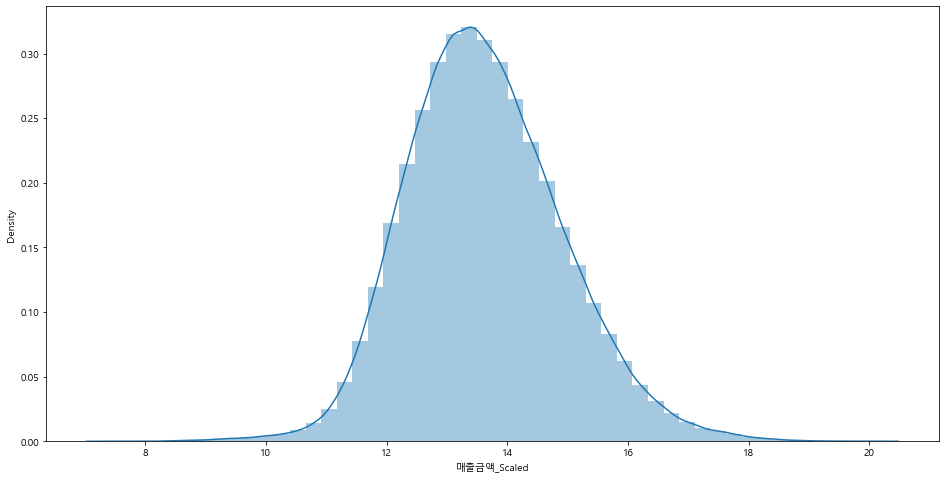

In [18]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출금액_Scaled'])

<AxesSubplot:xlabel='매출건수_Scaled', ylabel='Density'>

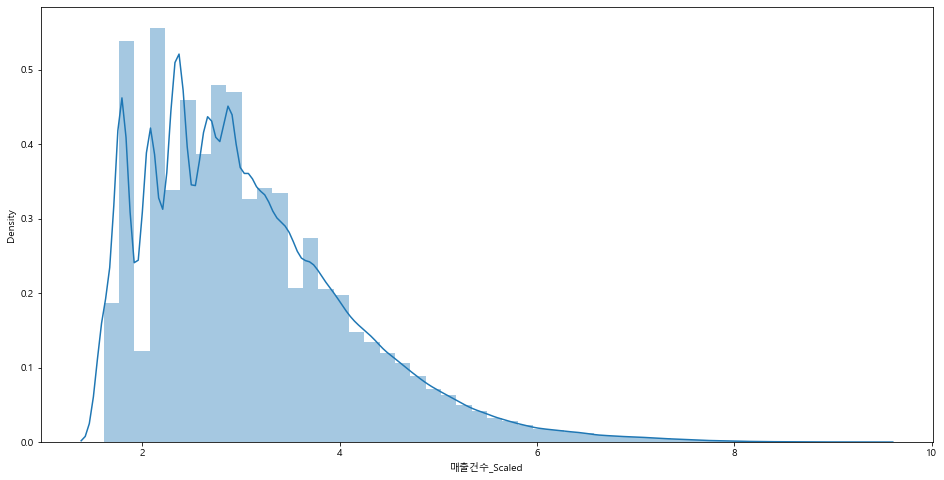

In [19]:
data_dummies = get_preprocessed_df(data_dummies, '매출건수')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출건수_Scaled'])

In [20]:
df_M_and_C = data_dummies[['매출금액_Scaled','매출건수_Scaled']]

target = data_dummies['품목대분류코드']
feature = df_M_and_C

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = pd.DataFrame(scaler.transform(feature), columns= feature.columns)

(array([0, 1]), [Text(0, 0, '매출금액_Scaled'), Text(1, 0, '매출건수_Scaled')])

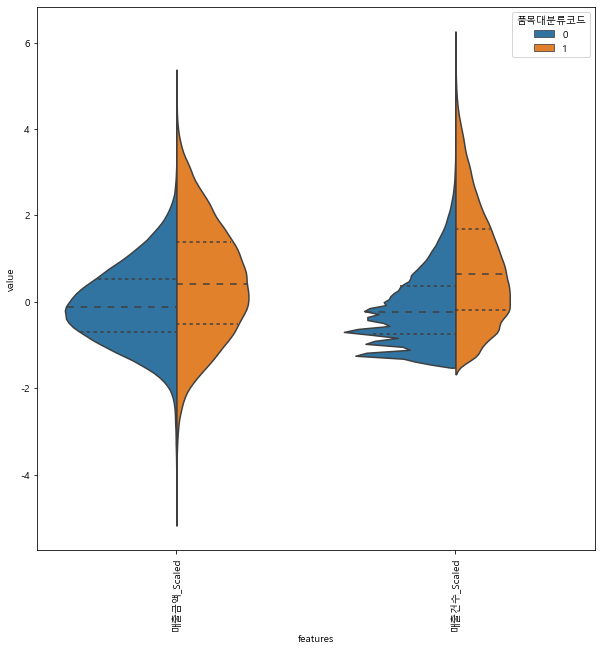

In [21]:
data = pd.concat([target, feature_scaled], axis = 1)
data = pd.melt(data, id_vars= '품목대분류코드', var_name= 'features', value_name= 'value')
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.violinplot(x = 'features', y = 'value', hue = '품목대분류코드', data = data, split = True, inner = 'quart')
plt.xticks(rotation= 90)

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, dt_pred, dt_pred_proba)

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, rf_pred, rf_pred_proba)

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[78632 10018]
 [ 9785  5425]]
정확도 : 0.8093, 정밀도 : 0.3513, 재현율 : 0.3567, F1 : 0.3540, AUC : 0.6219
오차 행렬
[[80982  7668]
 [ 9908  5302]]
정확도 : 0.8308, 정밀도 : 0.4088, 재현율 : 0.3486, F1 : 0.3763, AUC : 0.7459
오차 행렬
[[87069  1581]
 [11666  3544]]
정확도 : 0.8725, 정밀도 : 0.6915, 재현율 : 0.2330, F1 : 0.3486, AUC : 0.7922


In [35]:
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [36]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 21)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

xgb_clf = XGBClassifier(n_estimators = 500)
gb_clf = GradientBoostingClassifier()
rf_clf = RandomForestClassifier()

clf_list = [xgb_clf, gb_clf, rf_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)


[21:30:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[86795  1855]
 [10894  4316]]
정확도 : 0.8772, 정밀도 : 0.6994, 재현율 : 0.2838, F1 : 0.4037, AUC : 0.8104
오차 행렬
[[87603  1047]
 [11997  3213]]
정확도 : 0.8744, 정밀도 : 0.7542, 재현율 : 0.2112, F1 : 0.3300, AUC : 0.8071
오차 행렬
[[80771  7879]
 [ 9860  5350]]
정확도 : 0.8292, 정밀도 : 0.4044, 재현율 : 0.3517, F1 : 0.3762, AUC : 0.7512


In [25]:
ftr_importances = pd.Series(dt_clf.feature_importances_, index = X_features.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

Feature importance:\매출금액_Scaled    0.568
매출건수_Scaled    0.267
종로구            0.008
용산구            0.007
성남시            0.007
수원시            0.007
고양시            0.006
용인시            0.006
송파구            0.005
은평구            0.005
마포구            0.005
강남구            0.005
영등포구           0.005
구로구            0.005
강동구            0.005
서구             0.005
중구             0.005
성북구            0.005
강서구            0.005
성동구            0.004
dtype: float64


<AxesSubplot:>

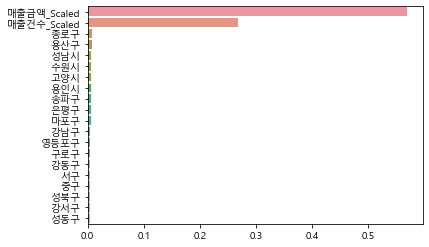

In [26]:
#feature importance 추출
print("Feature importance:\{0}".format(np.round(ftr_top20, 3)))

#feature importance를 column 별로 시각화하기
fig, ax = plt.subplots()
sns.barplot(x = ftr_top20, y = ftr_top20.index) 

In [27]:
def get_outlier_0(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index


def get_outlier_1(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index    

In [28]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data = data.drop(['품목대분류명', '품목중분류명'], axis = 1)
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)
data = get_encoding(data, '품목대분류코드', 16)

outlier_index = get_outlier_1(df = data, column='매출금액', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

outlier_index = get_outlier_1(df = data, column='매출건수', weight= 1.5, target = '품목대분류코드')
data.drop(outlier_index, axis = 0, inplace=True)

columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data)

data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
print(data_dummies.shape)

(509785, 41)


In [29]:
from sklearn.decomposition import PCA


y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

print(y_target.shape)
print(X_features.shape)

n = 8
pca = PCA(n_components= n)
data_pca = pca.fit_transform(X_features)
print(data_pca.shape)

pca_columns = []
for i in range(1, n + 1):
    component = 'pca_component_' + str(i)
    pca_columns.append(component)

df_pca = pd.DataFrame(data_pca, columns= pca_columns)
df_pca['target'] = np.array(y_target)

(509785,)
(509785, 40)
(509785, 8)


In [30]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

X_features = df_pca.drop('target', axis = 1)
y_target = df_pca['target']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
lgbm_clf = LGBMClassifier(n_estimators= 1000, num_leaves= 64, n_jobs= -1, boost_from_average = False)

clf_list = [dt_clf, lr_clf, lgbm_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
[[71371 19489]
 [ 6981  4116]]
정확도 : 0.7404, 정밀도 : 0.1744, 재현율 : 0.3709, F1 : 0.2372, AUC : 0.5783
오차 행렬
[[55447 35413]
 [ 4094  7003]]
정확도 : 0.6125, 정밀도 : 0.1651, 재현율 : 0.6311, F1 : 0.2617, AUC : 0.6605
오차 행렬
[[65926 24934]
 [ 4628  6469]]
정확도 : 0.7101, 정밀도 : 0.2060, 재현율 : 0.5830, F1 : 0.3044, AUC : 0.7396


In [31]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators = 1000)
xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds= 200, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.74212	validation_1-auc:0.74135
[1]	validation_0-auc:0.74989	validation_1-auc:0.74854
[2]	validation_0-auc:0.75189	validation_1-auc:0.75030
[3]	validation_0-auc:0.75442	validation_1-auc:0.75227
[4]	validation_0-auc:0.75733	validation_1-auc:0.75414
[5]	validation_0-auc:0.76024	validation_1-auc:0.75498
[6]	validation_0-auc:0.76068	validation_1-auc:0.75523
[7]	validation_0-auc:0.76239	validation_1-auc:0.75594
[8]	validation_0-auc:0.76637	validation_1-auc:0.75646
[9]	validation_0-auc:0.76889	validation_1-auc:0.75691
[10]	validation_0-auc:0.77002	validation_1-auc:0.75733
[11]	validation_0-auc:0.77201	validation_1-auc:0.75759
[12]	validation_0-auc:0.77503	validation_1-auc:0.75739
[13]	validation_0-auc:0.77601	validation_1-auc:0.75782
[14]	validation_0-auc:0.77816	validation_1-auc:0.75805
[15]	validation_0-auc:0.78050	validation_1-auc:0.75846
[16]	validation_0-auc:0.78134	validation_1-auc:0.75858
[17]	validation_0-auc:0.78242	validation_1-auc:0.75857
[18]	validation_0-au

In [32]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_over, y_train_over)
gb_pred = gb_clf.predict(X_test)
gb_pred_proba = gb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, gb_pred, gb_pred_proba)

오차 행렬
[[53248 37612]
 [ 2165  8932]]
정확도 : 0.6099, 정밀도 : 0.1919, 재현율 : 0.8049, F1 : 0.3099, AUC : 0.7576


In [33]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

params = {
    'max_depth' : [5, 7],
    'min_child_weight' : [1, 3],
    'colsample_bytree' : [0.5, 0.75]
}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv = 3, verbose= 1)
grid_cv.fit(X_train_over, y_train_over, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[0]	validation_0-auc:0.68420	validation_1-auc:0.68243
[1]	validation_0-auc:0.73644	validation_1-auc:0.73341
[2]	validation_0-auc:0.74731	validation_1-auc:0.74570
[3]	validation_0-auc:0.74901	validation_1-auc:0.74648
[4]	validation_0-auc:0.75219	validation_1-auc:0.74964
[5]	validation_0-auc:0.75436	validation_1-auc:0.75154
[6]	validation_0-auc:0.75571	validation_1-auc:0.75236
[7]	validation_0-auc:0.75813	validation_1-auc:0.75261
[8]	validation_0-auc:0.75854	validation_1-auc:0.75268
[9]	validation_0-auc:0.76419	validation_1-auc:0.75389
[10]	validation_0-auc:0.76520	validation_1-auc:0.75455
[11]	validation_0-auc:0.76553	validation_1-auc:0.75447
[12]	validation_0-auc:0.76593	validation_1-auc:0.75431
[13]	validation_0-auc:0.76676	validation_1-auc:0.75451
[14]	validation_0-auc:0.76743	validation_1-auc:0.75473
[15]	validation_0-auc:0.76782	validation_1-auc:0.75477
[16]	validation_0-auc:0.76906	validation_1-auc:0.75535
[17]	validation

In [34]:
lgbm_clf = LGBMClassifier(n_estimators= 200)

params = {
    'num_leaves' : [32, 64],
    'max_depth' : [128, 160],
    'min_child_samples' : [60, 100],
    'subsample' : [0.8, 1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid= params, cv = 3)
gridcv.fit(X_train_over, y_train_over, early_stopping_rounds =  30, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
print('최고 auc: {0:.4f}'.format(roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')))
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

[1]	valid_0's auc: 0.750981	valid_0's binary_logloss: 0.672856	valid_1's auc: 0.747304	valid_1's binary_logloss: 0.673179
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.75392	valid_0's binary_logloss: 0.656293	valid_1's auc: 0.751179	valid_1's binary_logloss: 0.65741
[3]	valid_0's auc: 0.755132	valid_0's binary_logloss: 0.642521	valid_1's auc: 0.751965	valid_1's binary_logloss: 0.644732
[4]	valid_0's auc: 0.756663	valid_0's binary_logloss: 0.630997	valid_1's auc: 0.753103	valid_1's binary_logloss: 0.634485
[5]	valid_0's auc: 0.757533	valid_0's binary_logloss: 0.621272	valid_1's auc: 0.75387	valid_1's binary_logloss: 0.626053
[6]	valid_0's auc: 0.75781	valid_0's binary_logloss: 0.612982	valid_1's auc: 0.754138	valid_1's binary_logloss: 0.619109
[7]	valid_0's auc: 0.758144	valid_0's binary_logloss: 0.605939	valid_1's auc: 0.754603	valid_1's binary_logloss: 0.613329
[8]	valid_0's auc: 0.75906	valid_0's binary_logloss: 0.599827	valid_1's auc: 0.754969	val